Sobre Frequencia:

- A frequencia padrão no Brasil é de 60hz de corrente alternada
- A frequencia é a velocidade em que a corrente alternada vai e volta.
- O sistema elétrico brasileiro é padronizado para suportar oscilações entre 59,9 Hz e 60,1 Hz

### Importando Bibliotecas

In [1]:
import time
import sys
import math
import random
import psutil as ps
import matplotlib.pyplot as plt
import numpy as np
import mysql.connector
from datetime import datetime

### Criando conexão com o banco de dados

In [3]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="urubu100",
  database="algas"
)

mycursor = mydb.cursor()
sql = "INSERT INTO dados (valor) VALUES (%s)"

### Definindo Funções

Função get_transactions()

In [4]:
def get_transactions(start, stop, step):
    transactions = []
    for i in range(start, stop, step):
        transactions.append(i)
    return transactions

Função get_time()

In [5]:
def get_time():
    agora = time.time()
    hoje_meia_noite = datetime.combine(datetime.today(), datetime.min.time())
    meia_noite_timestamp = time.mktime(hoje_meia_noite.timetuple())
    diferenca_segundos = agora - meia_noite_timestamp
    diferenca_minutos = diferenca_segundos / 60

    return diferenca_minutos


Função run()

In [ ]:
def run(start, stop, step):
    transactions = get_transactions(start, stop, step)
    arr = []
    arrTime = []
    for transaction in transactions:
        val = round(random.uniform(59.9,60.1),2)
        if random.randint(1,50) == 23:
            val = val + random.randint(1,50)
        arr.append(val)
        mycursor.execute(sql, (val,))
        mydb.commit()

        arrTime.append(math.floor(get_time() * 100) / 100,)
        
        

    return {
        'dados': arr,
        'times': arrTime,
    }

Função plot()

In [12]:
def plot(data):
  xpoints = np.array(list(range(0, len(data))))
  ypoints = np.array(data)
  plt.plot(xpoints, ypoints)
  plt.show()

# Gerando Valores

Range (10, 60, 10)

{'dados': [59.92, 59.92, 60.02, 60.08, 60.09, 59.94, 60.09, 59.98, 59.97, 60.09, 60.02, 60.01, 60.03, 60.06, 60.08, 60.07, 60.09, 59.99, 60.09, 59.97, 60.05, 59.91, 59.98, 59.94, 60.09], 'times': [1190.15, 1190.15, 1190.15, 1190.15, 1190.15, 1190.15, 1190.15, 1190.15, 1190.15, 1190.15, 1190.15, 1190.15, 1190.15, 1190.15, 1190.15, 1190.15, 1190.15, 1190.15, 1190.15, 1190.15, 1190.15, 1190.15, 1190.15, 1190.15, 1190.15]}


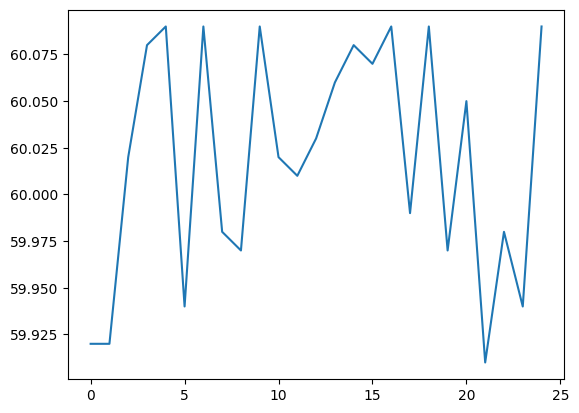

In [13]:
result = run(10, 60, 2)

print(result)

plot(result['dados'])

 Range (100, 600, 100)

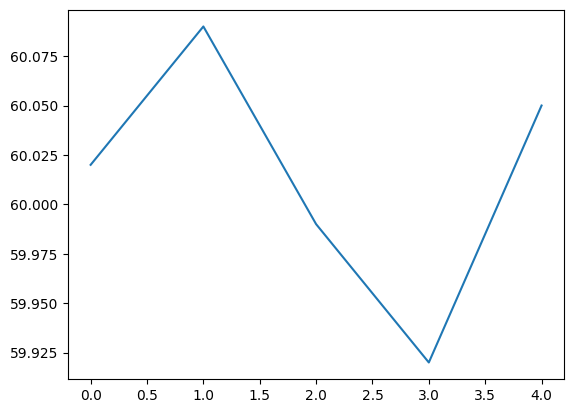

In [14]:
result = run(100, 600, 100)

plot(result['dados'])

Range (1000, 6000, 1000)

In [ ]:
result = run(1_000, 6_000, 1_000)

plot(result['dados'])

Range (100000, 600000, 100000)

In [ ]:
result = run(100_000, 600_000, 100_000)

plot(result['dados'])

 Range (1000000, 6000000, 1000000)

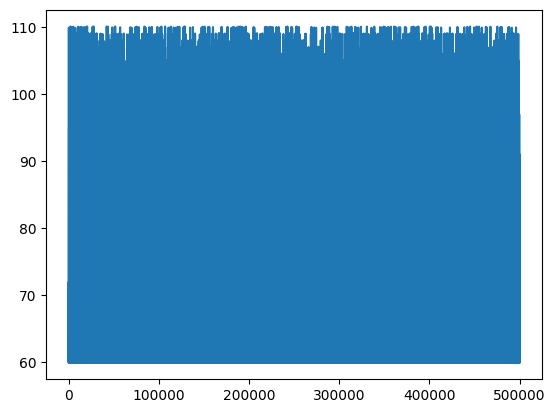

In [23]:
result = run(1_000_000, 6_000_000, 1_0)

plot(result['dados'])